# The Double Pendulum

The double pendulum is really fun to play with because it behaves so unpredictably. Set the parameters differently and you can get wildly different and chaotic results. I encourage you to play with at least changing the parameters.

To get chaotic behavior from an ODE, you need to make a more complicated system, or make it non linear. You can take the standard pendumum and add some driving force and friction, and get chaotic behavior. Here, I will do a double pendulum constructed of two massless rods with weights at the end and coupled with frictionless hinges. Note that massive rods are more realistic, but the math gets a lot more complicated without adding much to understanding.

This system, even somewhat simplified, is much easier to analyze using Lagrangian formulation than straigt forward Newtonian mechanics. See figure 7.3 in Taylor, or [Double Pendulum (Wikipedia)](https://en.wikipedia.org/wiki/Double_pendulum) the figure on the right there. There is also a brief discussion of the double pendulum in the "Scientific Computing with Python" book, page 67. We have one thin massless rod with length $l_1$ at angle $\theta_1$, with a mass $m_1$ at the end, and hanging from this is a second thin massless rod with length $l_2$ at angle $\theta_2$, with mass $m_2$ at the end. The angles $\theta_i$ are with respect to the vertical. (You can change this to massive rods, but that just complicates the math.)

The the centers of masses are then given by:
$$
\begin{array}{lcl}
x_1 &=& l_1 \sin \theta_1 \\
y_1 &=& -l_1 \cos \theta_1 \\
x_2 &=& l_1\sin \theta_1 + l_2 \sin \theta_2 \\
y_2 &=& -l_1\cos \theta_1 - l_2 \cos \theta_2
\end{array}
$$
The Lagrangian will then include the kinetic terms and the potential term. Here, ther simplification of using massless rods, so there is no rotational kinetic term, should be apparent. (No term $\frac{1}{2} I_1 \dot\theta_1^2  + \frac{1}{2} I_2 \dot\theta_2^2$). We get:

$$
\mathcal{L} = \frac{1}{2} m_1 (\dot x_1^2 + \dot y_1^2) + \frac{1}{2} m_2(\dot x_2^2 +\dot y_2^2)  - m_1 g y_1 - m_2 g y_2
$$


Now rewrite the linear coordinates in terms of the angles: 
$$\dot x_1^2 + \dot y_1^2 = l_1^2 \dot\theta_1^2$$
$$\dot x_2^2 + \dot y_2^2 = l_1^2\dot\theta_1^2 + l_2^2\dot\theta_2^2 + 2 l_1 l_2 \dot \theta_1 \dot \theta_2 \cos(\theta_1 - \theta_2)$$

Then we get
$$
\mathcal{L} = \frac{1}{2}(m_1 + m_2) l_1^2\dot\theta_1^2 + \frac{1}{2}m_2 l_2^2\dot\theta_2^2 + m_2 l_1 l_2 \dot\theta_1\dot\theta_2 \cos(\theta_1 - \theta_2) + (m_1 + m_2)g l_1 \cos(\theta_1) + m_2 g l_2 \cos(\theta_2)
$$

Yes, this is a bit of a mess, but not as bad as the case with rods of inertia $I_1$ and $I_2$.

We now would like to extract equations of motion for $\theta_1$ and $\theta_2$ as first order differential equations, which we can then integrate as before. 

We get Lagrange equations of the form:
$$
\begin{array}{lcl}
p_{\theta_1} &=& \frac{\partial}{\partial \dot \theta_1} L = (m_1+m_2) l_1^2\dot\theta_1 + m_2 l_1 l_2 \dot\theta_2\cos(\theta_1 - \theta_2) \\
p_{\theta_2} &=& \frac{\partial}{\partial \dot \theta_2} L = m_2 l_2^2\dot\theta_2 + m_2 l_1 l_2 \dot\theta_1\cos(\theta_1 - \theta_2) \\
\dot p_{\theta_1} &=& \frac{\partial}{\partial \theta_1} L = -m_2 l_1 l_2 \dot \theta_1\dot\theta_2\sin(\theta_1-\theta_2)-(m_1 + m_2)g l_1 \sin(\theta_1) \\
\dot p_{\theta_2} &=& \frac{\partial}{\partial \theta_2} L = m_2 l_1 l_2 \dot \theta_1\dot\theta_2\sin(\theta_1-\theta_2)-m_2 g l_2 \sin(\theta_2) 
\end{array}
$$

The Euler-Lagrange equations of motion for $\theta_1$ and $\theta_2$ are then found from:
$$
\begin{array}{lcl}
\frac{d}{dt}\frac{\partial}{\partial \dot \theta_1} L -\frac{\partial}{\partial \theta_1} L= 0 \\
\frac{d}{dt}\frac{\partial}{\partial \dot \theta_2} L -\frac{\partial}{\partial \theta_2} L= 0
\end{array}
$$
We need
$$
\begin{array}{lcl}
\frac{d}{dt}\frac{\partial}{\partial \dot \theta_1} L = \frac{d}{dt}(p_{\theta_1}) &=& 
(m_1+m_2)l_1^2 \ddot \theta_1 + m_2 l_1 l_2 \ddot \theta_2 \cos(\theta_1 - \theta_2) - m_2 l_1 l_2 \dot\theta_2 \sin(\theta_1 - \theta_2)(\dot \theta_1 - \dot \theta_2) \\
\frac{d}{dt}\frac{\partial}{\partial \dot \theta_2} L = \frac{d}{dt}(p_{\theta_2}) &=&
m_2 l_2^2\ddot \theta_2 + m_2 l_1 l_2 \ddot \theta_1 \cos(\theta_1 - \theta_2) - m_2 l_1 l_2 \dot \theta_1 \sin(\theta_1 - \theta_2)(\dot \theta_1 - \dot \theta_2)
\end{array}
$$

Plugging this in to get the Euler-Lagrange differential equations:

$$
\begin{array}{lcl}
(m_1+m_2)l_1^2 \ddot \theta_1 + m_2 l_1 l_2 \ddot \theta_2 \cos(\theta_1 - \theta_2) - m_2 l_1 l_2 \dot\theta_2 \sin(\theta_1 - \theta_2)(\dot \theta_1 - \dot \theta_2) &+& m_2 l_1 l_2 \dot \theta_1\dot\theta_2\sin(\theta_1-\theta_2) + (m_1 + m_2)g l_1 \sin(\theta_1) =0 \Rightarrow \\
(m_1+m_2)l_1 \ddot \theta_1 + m_2 l_2 \ddot \theta_2 \cos(\theta_1 - \theta_2) + m_2 l_2\dot\theta_2^2 \sin(\theta_1 - \theta_2) &+& (m_1 + m_2)g \sin(\theta_1) =0
\end{array}
$$
and
$$
\begin{array}{lcl}
m_2 l_2^2\ddot \theta_2 + m_2 l_1 l_2 \ddot \theta_1 \cos(\theta_1 - \theta_2) - m_2 l_1 l_2 \dot \theta_1 \sin(\theta_1 - \theta_2)(\dot \theta_1 - \dot \theta_2)  &-& m_2 l_1 l_2 \dot \theta_1\dot\theta_2\sin(\theta_1-\theta_2) + m_2 g l_2 \sin(\theta_2) =0  \Rightarrow \\
m_2 l_2\ddot \theta_2 + m_2 l_1 \ddot \theta_1 \cos(\theta_1 - \theta_2) - m_2 l_1 \dot \theta_1^2 \sin(\theta_1 - \theta_2)  &-&  + m_2 g  \sin(\theta_2) =0 
\end{array}
$$

We now need to re-write the equations once more to get all this in terms of a set of first order differential equations. Like before we want to re-express each of the second order differential equations in terms of two first order differential equations. We do this using:
$$
\begin{array}{lcl}
\dot \theta_i &=& \frac{d}{dt} \theta_i = \omega_i \\
\ddot \theta_i &=& \frac{d}{dt}\omega_i = f(\omega,\theta)
\end{array}
$$

We thus want to isolate $\ddot \theta_1$ and $\ddot \theta_2$. We start by rewriting the equations using $\omega$:
$$
\begin{array}{lcl}
(m_1+m_2)l_1 \ddot \theta_1 + m_2 l_2 \ddot \theta_2 \cos(\theta_1 - \theta_2) + m_2 l_2\omega_2^2 \sin(\theta_1 - \theta_2) &+& (m_1 + m_2)g \sin(\theta_1) =0 \\
m_2 l_2\ddot \theta_2 + m_2 l_1 \ddot \theta_1 \cos(\theta_1 - \theta_2) - m_2 l_1 \omega_1^2 \sin(\theta_1 - \theta_2)  &+&  m_2 g  \sin(\theta_2) =0
\end{array}
$$


Now we solve for $\ddot \theta1$ and substitute. After some simplifications (use a math program), you will get:

$$
\begin{array}{lcl}
\ddot \theta_1 = \dot \omega_1 &=& \frac{ -g(m_1+m_2)\sin(\theta_1) + g  m_2\cos(\theta_1-\theta_2) \sin(\theta_2)- l_1 m_2\omega_1^2 \cos(\theta_1 - \theta_2) \sin(\theta_1-\theta_2) - l_2 m_2 \omega_2^2 \sin(\theta_1- \theta_2)}
{l_1 \left(m_1 + m_2 - m_2\cos(\theta_1-\theta_2)^2 \right)} \\
\ddot \theta_2 =\dot \omega_2 &=& \frac{ (m_1+m_2)\left( g\cos(\theta_1 -\theta_2)\sin(\theta_1) - g\sin(\theta_2) +l_1 \omega_1^2\sin(\theta_1-\theta_2)\right) + l_2 m_2 \omega_2^2 \cos(\theta_1-\theta_2)\sin(\theta_1-\theta_2) }{l_2\left(m_1+m_2- m_2\cos(\theta_1 - \theta_2)^2 \right)}
\end{array}
$$

At this point, there is not much more that can be simplified. We now write the function that takes as input an array: $[\theta_1,\omega_1,\theta_2,\omega_2]$ at $t_i$, and returns the $[\dot\theta_1,\dot\omega_1,\dot\theta_2,\dot\omega_2]$ at $t_{i}$. This function can then be integrated with odeint.

In [1]:
"""
Author: Maurik Holtrop @ UNH
==============================================================
   The Double Pendumum
==============================================================
This code will integrate the equations for the double pendulum.
The output is an animated pendumum and graphs of the phase diagrams.
"""
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
#
# This function defines a time step t, for a double pendulum.
#
def double_pendulum_step(invars,t,params):
    theta1,omega1,theta2,omega2 = invars  # Unpack (rename) the input for ease of use.
    l1,m1,l2,m2,g = params                # Upack the parameters for ease of use.
    
    out = np.zeros_like(invars)
    out[0] = omega1  
    out[2] = omega2 
    
    cdt = np.cos(theta1-theta2) # Cosine diff theta
    sdt = np.sin(theta1-theta2) # Sine diff theta
    if l1 > 0. and m1>0.:       # If this is not true, then frac1 can be zero!
        frac1 = l1*(m1 + m2 - m2*cdt**2) 
        d_omega1 = ( -g*(m1+m2)*np.sin(theta1) +
                    g*m2*cdt*np.sin(theta2)-
                    l1*m2*omega1*omega1*cdt*sdt -    # np.sin(theta1) -
                    l2*m2*omega2*omega2*sdt )/frac1
    else:
        d_omega1 = 0*omega1
        
    if l2 > 0. and m1>0.:      # If this is not true, then frac1 can be zero!
        frac2 = l2*(m1+m2- m2*cdt*cdt)
        d_omega2 =((m1+m2)*(g*cdt*np.sin(theta1)-g*np.sin(theta2)+l1*omega1*omega1*sdt) +
                    l2*m2*omega2*omega2*cdt*sdt )/frac2
    else:
        d_omega2 = 0*omega2
        
    out[1] = d_omega1
    out[3] = d_omega2
    return(out)


## Integrating the ODE
Here we integrate the ODE that we setup above.

An important question arises: Did we do all that math correctly, and did we code it up correctly?

To answer that question, it helps to take some limiting cases where you understand the behavior you would expect. Note that you _also_ have to set initial conditions is a sane way, to get sane output, in other words, if a lenght L goes to zero, set the angle also to zero:
* Take L1=0,$\theta_1(0)$=0 then you get a normal pendulum with length L2 and M2 for mass
* Take L2=0,$\theta_2(0)$=0 then you get a normal pendulum with length L1 and (M1+M2) for mass.
* Take M1<<1.,$\theta_1(0)=\theta_2(0)$ then you get a normal pendulum with length L1+L2 and M2 for mass. Note that M1=0 leads to an exception, where we divide by zero.
* Take M2=0, then you get a normal pendulum with length L1 and mass M1 for the upper half, but the $\theta2$ will be undetermined! Set L2=0 as well, then this seems OK, but L2>0 leads to increased swining of the bottom part!

There are certain modes of a double pendulum that are _not_ chaotic. One of those is L1=L2 and M1=M2, with initial condition $\theta_1(0) = -\theta_2(0)$. Try it. I found it is close, but not _quite_ what I had predicted. 

In [3]:
# Setup the constants for the problem.
#

G = 9.8  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
M1 = 1.1  # mass of pendulum 1 in kg
L2 = 0.47  # length of pendulum 2 in m
M2 = 0.5  # mass of pendulum 2 in kg
parameters = (L1,M1,L2,M2,G)
# theta1_0 and theta2_0 are the initial angles (degrees)
# omega1_0 and omega2_0 are the initial angular velocities (degrees per second)
theta1_0 = 80.0
omega1_0 = 0.0
theta2_0 = -25.0
omega2_0 = 0.0

# Define the Initial State of the problem.
state = np.radians([theta1_0,omega1_0,theta2_0,omega2_0])

# create a time array from 0..60 seconds, sampled at dt second steps
# Making the step size too small increases computational time, but makes the solution more accurate.
Max_time = 30
dt = 0.05
t = np.arange(0.0, Max_time, dt)

#
# For clarity of coding, define the indexes.
#
i_theta1 = 0
i_omega1 = 1
i_theta2 = 2
i_omega2 = 3

# We integrate the ODE using scipy.integrate. This does the computational heavy lifting for us.
%time result_t = integrate.odeint(double_pendulum_step, state, t,args=(parameters,))
#
#
# The result_t is now an array of arrays. 
# The first index are the time steps, the second are the variable index.
# Convert the polar coordinates back to cartesian (x,y)
x1 = L1*np.sin(result_t[:, i_theta1])
y1 = -L1*np.cos(result_t[:,i_theta1])

x2 = L2*np.sin(result_t[:, i_theta2]) + x1
y2 = -L2*np.cos(result_t[:,i_theta2]) + y1


CPU times: user 205 ms, sys: 30.2 ms, total: 235 ms
Wall time: 216 ms


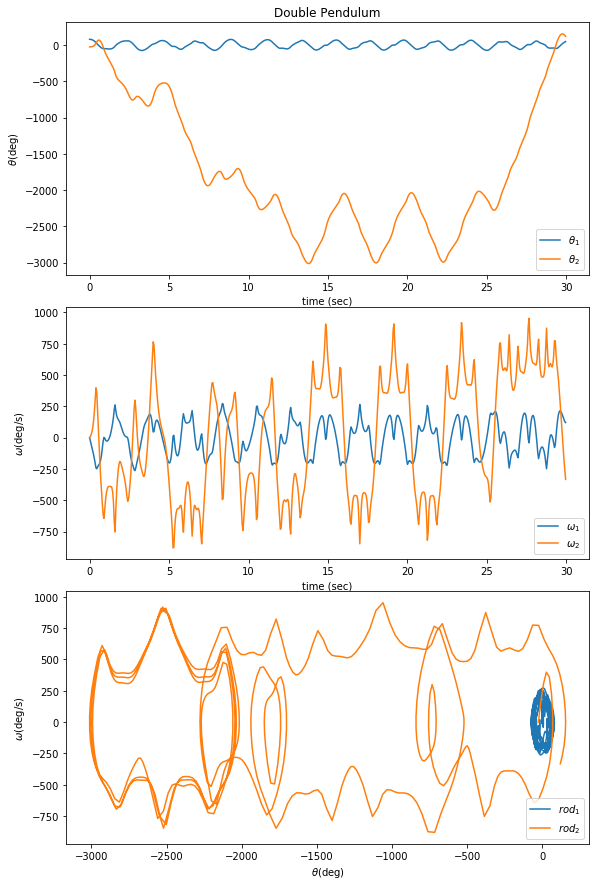

In [4]:
fig1,(ax1,ax2,ax3) = plt.subplots(3,sharex=False,figsize=(8,12))
plt.tight_layout()
ax1.set_title('Double Pendulum')
ax1.set_xlabel('time (sec)')
ax1.set_ylabel("$\\theta$(deg)")
ax1.plot(t,result_t[:,i_theta1]*180./np.pi,label="$\\theta_1$")
ax1.plot(t,result_t[:,i_theta2]*180./np.pi,label="$\\theta_2$")
ax1.legend(loc="lower right")

ax2.set_xlabel('time (sec)')
ax2.set_ylabel("$\omega$(deg/s)")
ax2.plot(t,result_t[:,i_omega1]*180./np.pi,label="$\\omega_1$")
ax2.plot(t,result_t[:,i_omega2]*180./np.pi,label="$\\omega_2$")
ax2.legend(loc="lower right")

ax3.plot(result_t[:,i_theta1]*180./np.pi,result_t[:,i_omega1]*180./np.pi,label="$rod_1$")
ax3.plot(result_t[:,i_theta2]*180./np.pi,result_t[:,i_omega2]*180./np.pi,label="$rod_2$")
ax3.set_xlabel("$\\theta$(deg)")
ax3.set_ylabel("$\omega$(deg/s)")
ax3.legend(loc="lower right")

Animation build, start making movie.


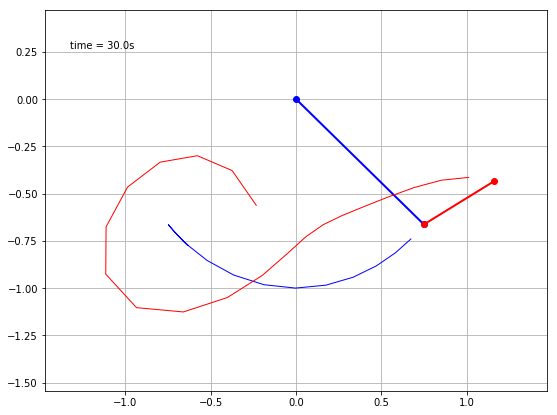

In [6]:
fig2 = plt.figure(figsize=(9,7))
plt.tight_layout()
ax = fig2.add_subplot(111, autoscale_on=False, xlim=(-(L1+L2), (L1+L2)), ylim=(-(L1+L2)*1.05, (L2)))
ax.grid()

max_trace_depth=int(1/dt) # Trace of one second.
line1, = ax.plot([], [], 'o-', lw=2,color="blue") # A line without the parameters set.
trace1, = ax.plot([],[], lw=1,color="blue")
line2, = ax.plot([], [], 'o-', lw=2,color="red") # A line without the parameters set.
trace2, = ax.plot([],[], lw=1,color="red")
time_template = 'time = %.1fs'      # To print the time on the plot
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():                   # initialize everything
    line1.set_data([], [])
    line2.set_data([], [])
    trace1.set_data([],[])
    trace2.set_data([],[])
    time_text.set_text('')
    return line1,line2,trace1,trace2, time_text


def animate(i):               # Do animation step i.
    thisx1 = [0, x1[i]]
    thisy1 = [0, y1[i]]
    thisx2 = [x1[i], x2[i]]
    thisy2 = [y1[i], y2[i]]
    line1.set_data(thisx1, thisy1)
    line2.set_data(thisx2, thisy2)
    if i < max_trace_depth:
        trace1.set_data(x1[0:i],y1[0:i])
        trace2.set_data(x2[0:i],y2[0:i])
    else:
        trace1.set_data(x1[i-max_trace_depth:i],y1[i-max_trace_depth:i])
        trace2.set_data(x2[i-max_trace_depth:i],y2[i-max_trace_depth:i])

    time_text.set_text(time_template % (i*dt))
    return line1,line2,trace1,trace2, time_text


#
#  Now run the animation.
#
#
# For more on how to animate your results, see:
# https://matplotlib.org/api/animation_api.html
# and
# https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial
#
ani = animation.FuncAnimation(fig2, animate, np.arange(1, len(result_t)),
                              interval=100, blit=True, init_func=init)
print("Animation build, start making movie.")
# Note: interval is the delay between frames in ms, IF your computer can keep up.
# So a larger number slows down the animation, a smaller number speeds it up.
# To get "real time" you would want this to be dt*1000. It is ignored for some output.
# 
# Don't make the movie.
# video = HTML(ani.to_html5_video())
#
# Just show the result.
# This is a very time consuming step! It makes lots of pictures and then
# stiches them togeting into an html5 video.
#
# You can show this as an html5 video or a JavaScript video.
#
HTML(ani.to_html5_video())   
# HTML(ani.to_jshtml(fps=10)) # This must be the last statement in the "cell"
# You may get a warning the size is too big! That's OK.